<a href="https://colab.research.google.com/github/himaniyadav/fastai_practice/blob/master/seasons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasons Dataset

In [0]:
from fastai import *
from fastai.vision import *

### Data Setup

In [0]:
classes = ['summer','winter','autumn','spring']

In [0]:
for c in classes:
  folder = c
  file = 'urls_' + c + '.csv'
  path = Path('data/seasons')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [9]:
path.ls()

[PosixPath('data/seasons/autumn'),
 PosixPath('data/seasons/winter'),
 PosixPath('data/seasons/summer'),
 PosixPath('data/seasons/spring')]

In [0]:
classes = ['summer','winter','autumn','spring']

In [0]:
download_images(path/'autumn forest', path/'autumn', max_pics=200)
download_images(path/'spring forest', path/'spring', max_pics=200)
download_images(path/'summer forest', path/'summer', max_pics=200)
download_images(path/'winter forest', path/'winter', max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['autumn', 'spring', 'summer', 'winter']

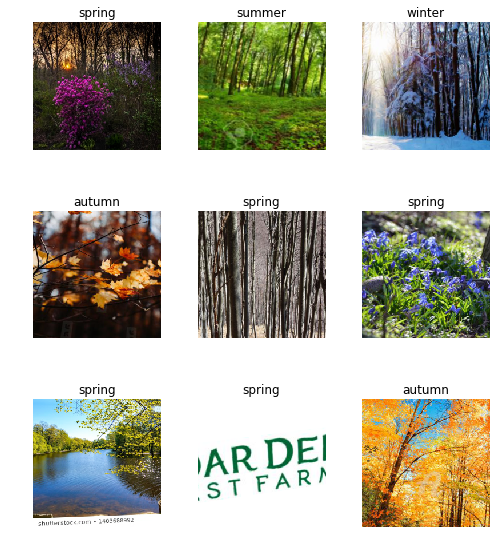

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['autumn', 'spring', 'summer', 'winter'], 4, 311, 77)

### Training model

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 22.2MB/s]


In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.308596,1.752828,0.558442,00:08
1,1.696555,1.384808,0.376623,00:06
2,1.359072,1.122647,0.259740,00:06
3,1.143465,1.035356,0.246753,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


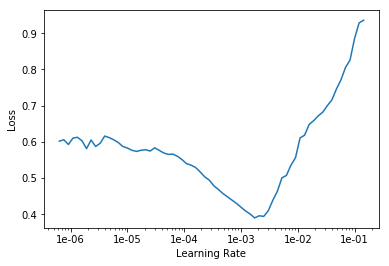

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.536791,0.921811,0.259740,00:07
1,0.558246,0.752547,0.181818,00:07
2,0.452797,0.665705,0.142857,00:07


In [0]:
learn.save('stage-2')

### Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

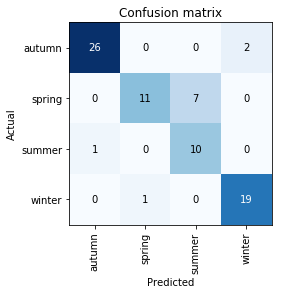

In [30]:
interp.plot_confusion_matrix()

### Cleanup

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
#ImageCleaner(ds, idxs, path)
#can't run this code in Colab actually :(
